In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def calculate_greeks(S, T, r, q, sigma, K):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    # Calculate delta for call option: e^(-qT) * N(d1)
    call_delta = np.exp(-q * T) * norm.cdf(d1)
    put_delta = np.exp(-q * T) * norm.cdf(d1) - np.exp(-q * T)
    gamma=np.exp(-q*T) * norm.pdf(d1)/(sigma * S * np.sqrt(T))
    vega=np.exp(-q*T) * S * np.sqrt(T) * norm.pdf(d1)
    return {'Call_Delta': call_delta, 'Put_Delta': put_delta,
            'Gamma': gamma, 'Vega': vega}


In [3]:
# Black-Scholes parameters
S = 100  # Current stock price
T = 1.0  # Time to expiration (1 year)
r = 0.05  # Risk-free rate (5%)
q = 0.02  # Dividend yield (2%)
sigma = 0.2  # Volatility (20%)

# Range of strike prices
# K = np.linspace(50, 150, 100)  # Strike prices from 50 to 150
K = 100
S = np.linspace(50, 150, 100)

T_list=[0.05, 0.5, 1]
greeks_list=[calculate_greeks(S, T, r, q, sigma, K) for T in T_list]

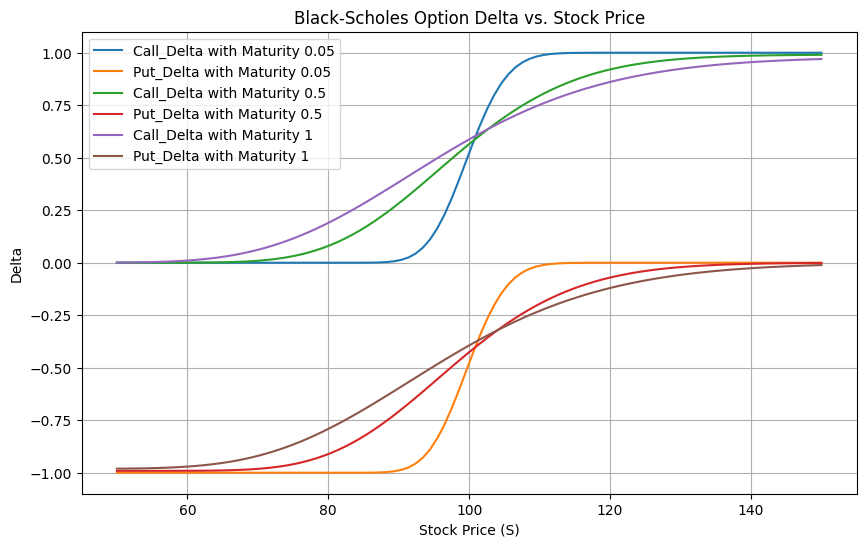

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
for T, greeks in zip(T_list, greeks_list):
    for index, value in greeks.items():
            if 'Delta' in index:
                plt.plot(S, value, label=f'{index} with Maturity {T}')
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.title('Black-Scholes Option Delta vs. Stock Price')
plt.grid(True)
plt.legend()
plt.show()

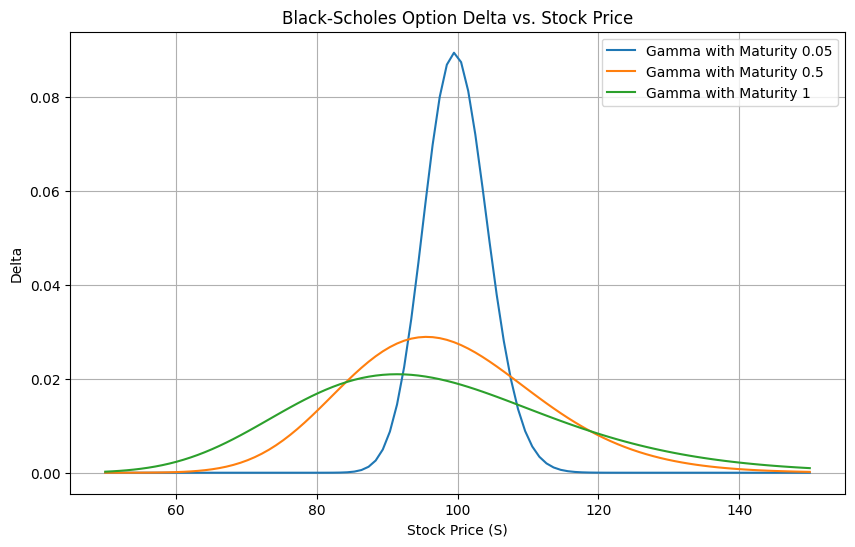

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
for T, greeks in zip(T_list, greeks_list):
    for index, value in greeks.items():
            if 'Gamma' in index:
                plt.plot(S, value, label=f'{index} with Maturity {T}')
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.title('Black-Scholes Option Delta vs. Stock Price')
plt.grid(True)
plt.legend()
plt.show()

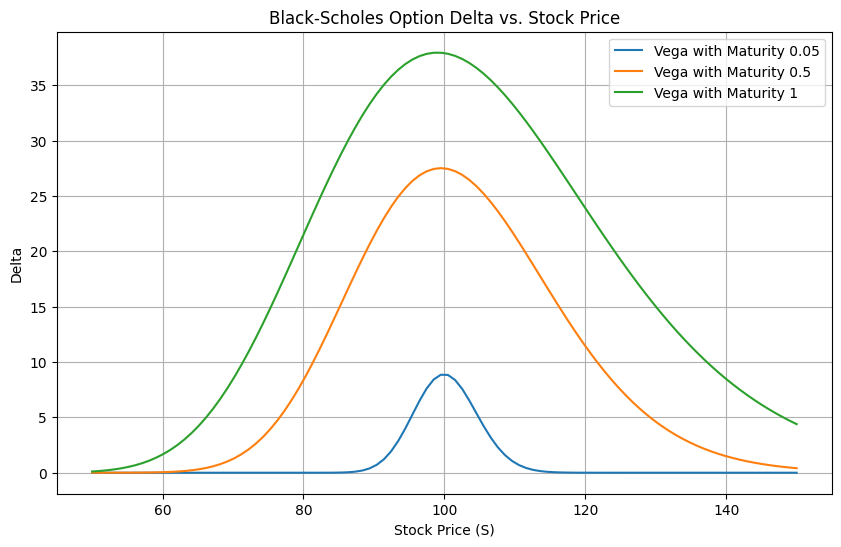

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
for T, greeks in zip(T_list, greeks_list):
    for index, value in greeks.items():
            if 'Vega' in index:
                plt.plot(S, value, label=f'{index} with Maturity {T}')
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.title('Black-Scholes Option Delta vs. Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# Black-Scholes parameters
S = 100  # Current stock price
r = 0.05  # Risk-free rate (5%)
q = 0.02  # Dividend yield (2%)
sigma = 0.2  # Volatility (20%)

T = np.linspace(0.01, 1, 100)
K_list = [90, 100, 110]
greeks_list = [calculate_greeks(S, T, r, q, sigma, K) for K in K_list]

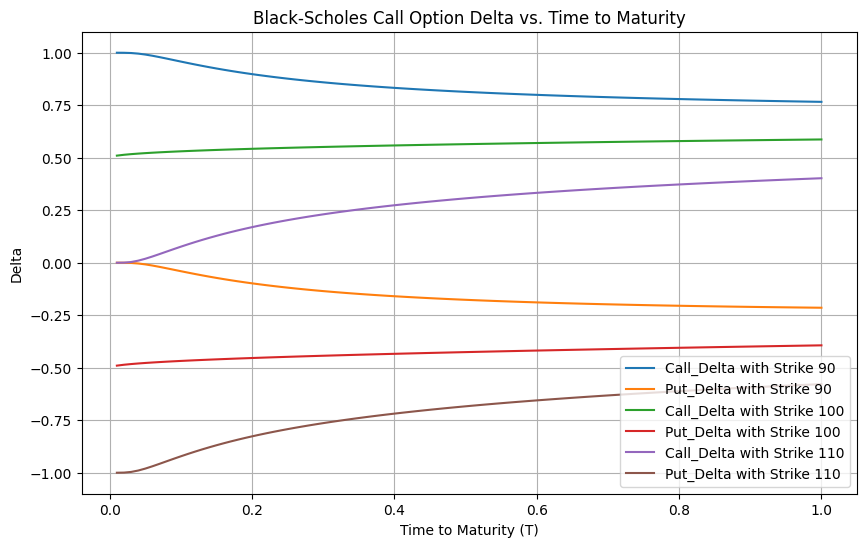

In [8]:
# Plotting

plt.figure(figsize=(10, 6))
for K, greeks in zip(K_list, greeks_list):
    for index, value in greeks.items():
        if 'Delta' in index:
            plt.plot(T, value, label=f'{index} with Strike {K}')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Delta')
plt.title('Black-Scholes Call Option Delta vs. Time to Maturity')
plt.grid(True)
plt.legend()
plt.show()

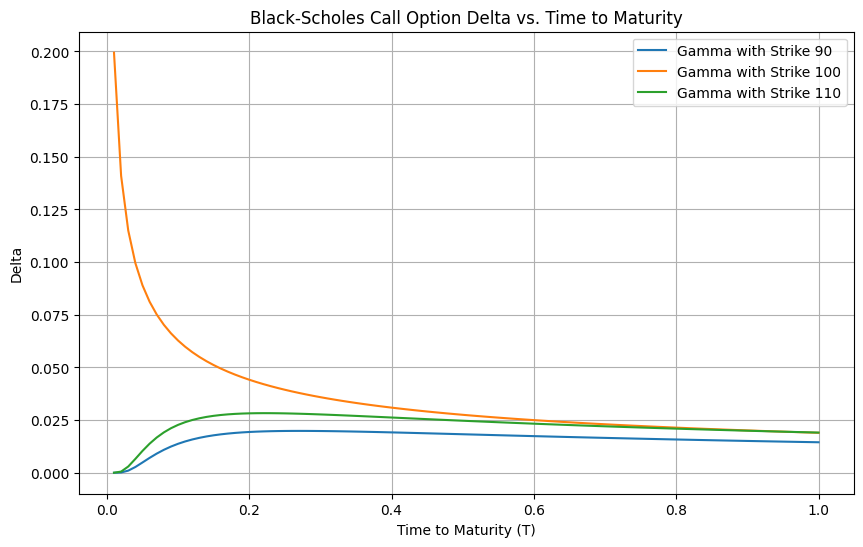

In [9]:
# Plotting

plt.figure(figsize=(10, 6))
for K, delta in zip(K_list, greeks_list):
    for index, value in delta.items():
        if 'Gamma' in index:
            plt.plot(T, value, label=f'{index} with Strike {K}')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Delta')
plt.title('Black-Scholes Call Option Delta vs. Time to Maturity')
plt.grid(True)
plt.legend()
plt.show()

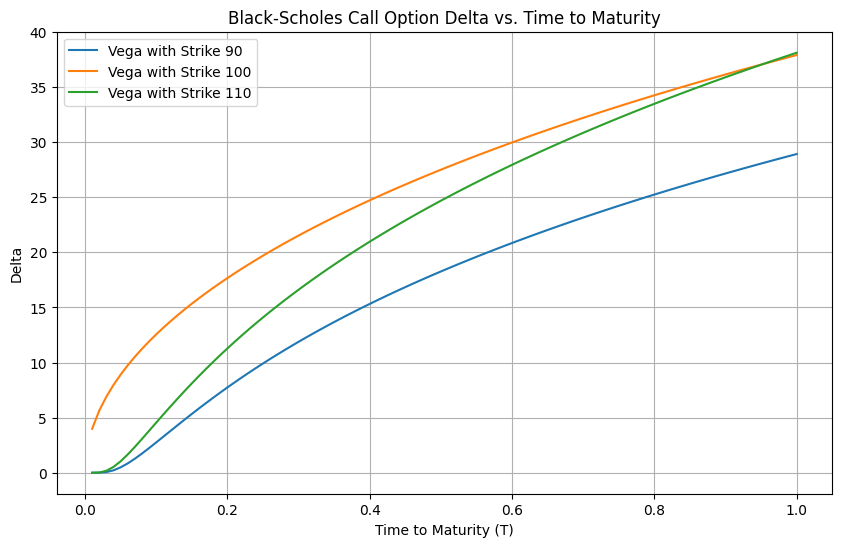

In [10]:
# Plotting

plt.figure(figsize=(10, 6))
for K, delta in zip(K_list, greeks_list):
    for index, value in delta.items():
        if 'Vega' in index:
            plt.plot(T, value, label=f'{index} with Strike {K}')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Delta')
plt.title('Black-Scholes Call Option Delta vs. Time to Maturity')
plt.grid(True)
plt.legend()
plt.show()